# Import Dataset and Libraries

In [3]:
import tensorflow as tf
from tensorflow import keras

# new imports
from keras.layers import Dense, Dropout

import numpy as np

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


## Import Fashion MNIST Dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.dtype

dtype('uint8')

## Pre-Processing

In [7]:
#Performs element-wise division operation on the numpy array

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## Model Creation using Sequential API

In [100]:
# Sequential API

# Instantiate a keras Sequential model
model = keras.models.Sequential()

# Input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))

# Dense(hidden) layer
# model.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))
model.add(Dropout(0.2))

model.add(keras.layers.Dense(562, activation='sigmoid'))

model.add(keras.layers.Dense(232, activation='relu'))

model.add(keras.layers.Dense(90, activation='swish'))

# Output layer
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

In [101]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dropout_9 (Dropout)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 562)               441170    
                                                                 
 dense_32 (Dense)            (None, 232)               130616    
                                                                 
 dense_33 (Dense)            (None, 90)                20970     
                                                                 
 dense_34 (Dense)            (None, 10)                910       
                                                                 
Total params: 593,666
Trainable params: 593,666
Non-tr

## Creating Loss function

In [102]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [103]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5394 - accuracy: 0.8001 - val_loss: 0.3979 - val_accuracy: 0.8508
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4178 - accuracy: 0.8450 - val_loss: 0.3661 - val_accuracy: 0.8666
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8594 - val_loss: 0.3582 - val_accuracy: 0.8690
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3499 - accuracy: 0.8689 - val_loss: 0.3151 - val_accuracy: 0.8834
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3282 - accuracy: 0.8759 - val_loss: 0.3057 - val_accuracy: 0.8850
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3140 - accuracy: 0.8809 - val_loss: 0.3102 - val_accuracy: 0.8812
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2973 - accuracy: 0.8876 - val_loss: 0.2948 - val_accuracy:

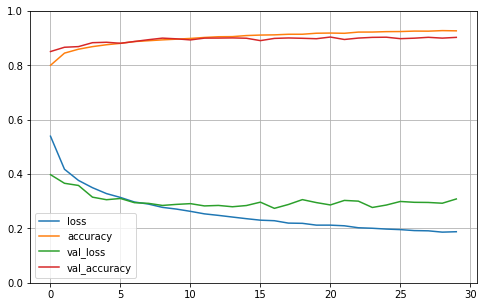

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # sets vertical range to [0-1]
plt.show()

## Evaluate on the Test set

In [105]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8955


[0.3322638273239136, 0.8955000042915344]

## Making Predictions

In [106]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

1/1 [==============================] - 0s 56ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.006, 0.   ,
        0.993],
       [0.   , 0.   , 0.991, 0.   , 0.007, 0.   , 0.003, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [107]:
# Predicted
y_pred = np.argmax(model.predict(X_new), axis=1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 14ms/step


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [108]:
# Actual
Y_new = y_test[:3]
np.array(class_names)[Y_new]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

## Hyperparameter Tuning

In [72]:
# do this (mess around with the Dense() function)